In [217]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [207]:
logs = pickle.load(open("log.txt", "rb"))

In [208]:
y = []
yerr = []
x = []
for log in logs:
    y.append(np.mean(log['return_per_episode']))
    yerr.append(np.std(log['return_per_episode']))
    x.append(log['difficulty'])

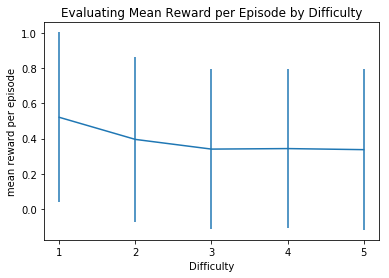

In [209]:
plt.errorbar(y=y, x=x, yerr=yerr)
plt.xticks(x)
plt.title("Evaluating Mean Reward per Episode by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("mean reward per episode")
plt.savefig("perf_hist.png")


In [210]:
y = []
yerr = []
x = []
for log in logs:
    y.append(np.sum(np.array(log['return_per_episode']) != 0) / len(log['return_per_episode']))
    x.append(log['difficulty'])

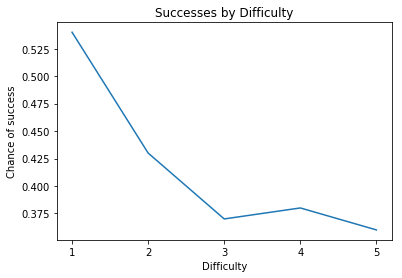

In [211]:
plt.errorbar(y=y, x=x)
plt.xticks(x)
plt.title("Successes by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Chance of success")
plt.savefig("successes_by_difficulty.png")


In [212]:
y = []
yerr = []
x = []
for log in logs:
    return_per_episode = np.array([x for x in np.array(log['return_per_episode']) if x != 0])
    y.append(np.mean(return_per_episode))
    yerr.append(np.std(return_per_episode))
    x.append(log['difficulty'])

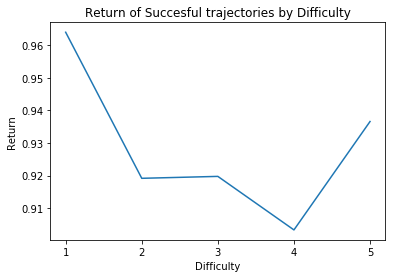

In [213]:
plt.errorbar(y=y, x=x)
plt.xticks(x)
plt.title("Return of Succesful trajectories by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Return")
plt.savefig("return_of_succesful_traj_by_difficulty.png")


In [214]:
y = []
x = []
yerr = []
for log in logs:
    y.append(np.mean(log['target_path_length']))
    yerr.append(np.std(log['target_path_length']))
    x.append(log['difficulty'])

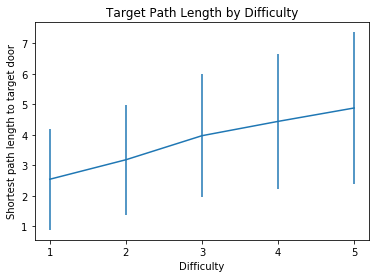

In [215]:
plt.errorbar(y=y, x=x, yerr=yerr)
plt.xticks(x)
plt.title("Target Path Length by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Shortest path length to target door")
plt.savefig("target_path_length.png")
